# Import Library

In [1]:
! pip install missingno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import os

# Import Data

In [3]:
df = pd.read_csv('D:\MyProject\Project Churn Prediction Teleco\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Drop Column not Important

In [6]:
# Drop column customerID because not important
df = df.drop(['customerID'], axis=1)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# changing 'TotalCharges' object data type to float
# changing 'SeniorCitizen' int data type to object

df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# EDA

### Checking missing value

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

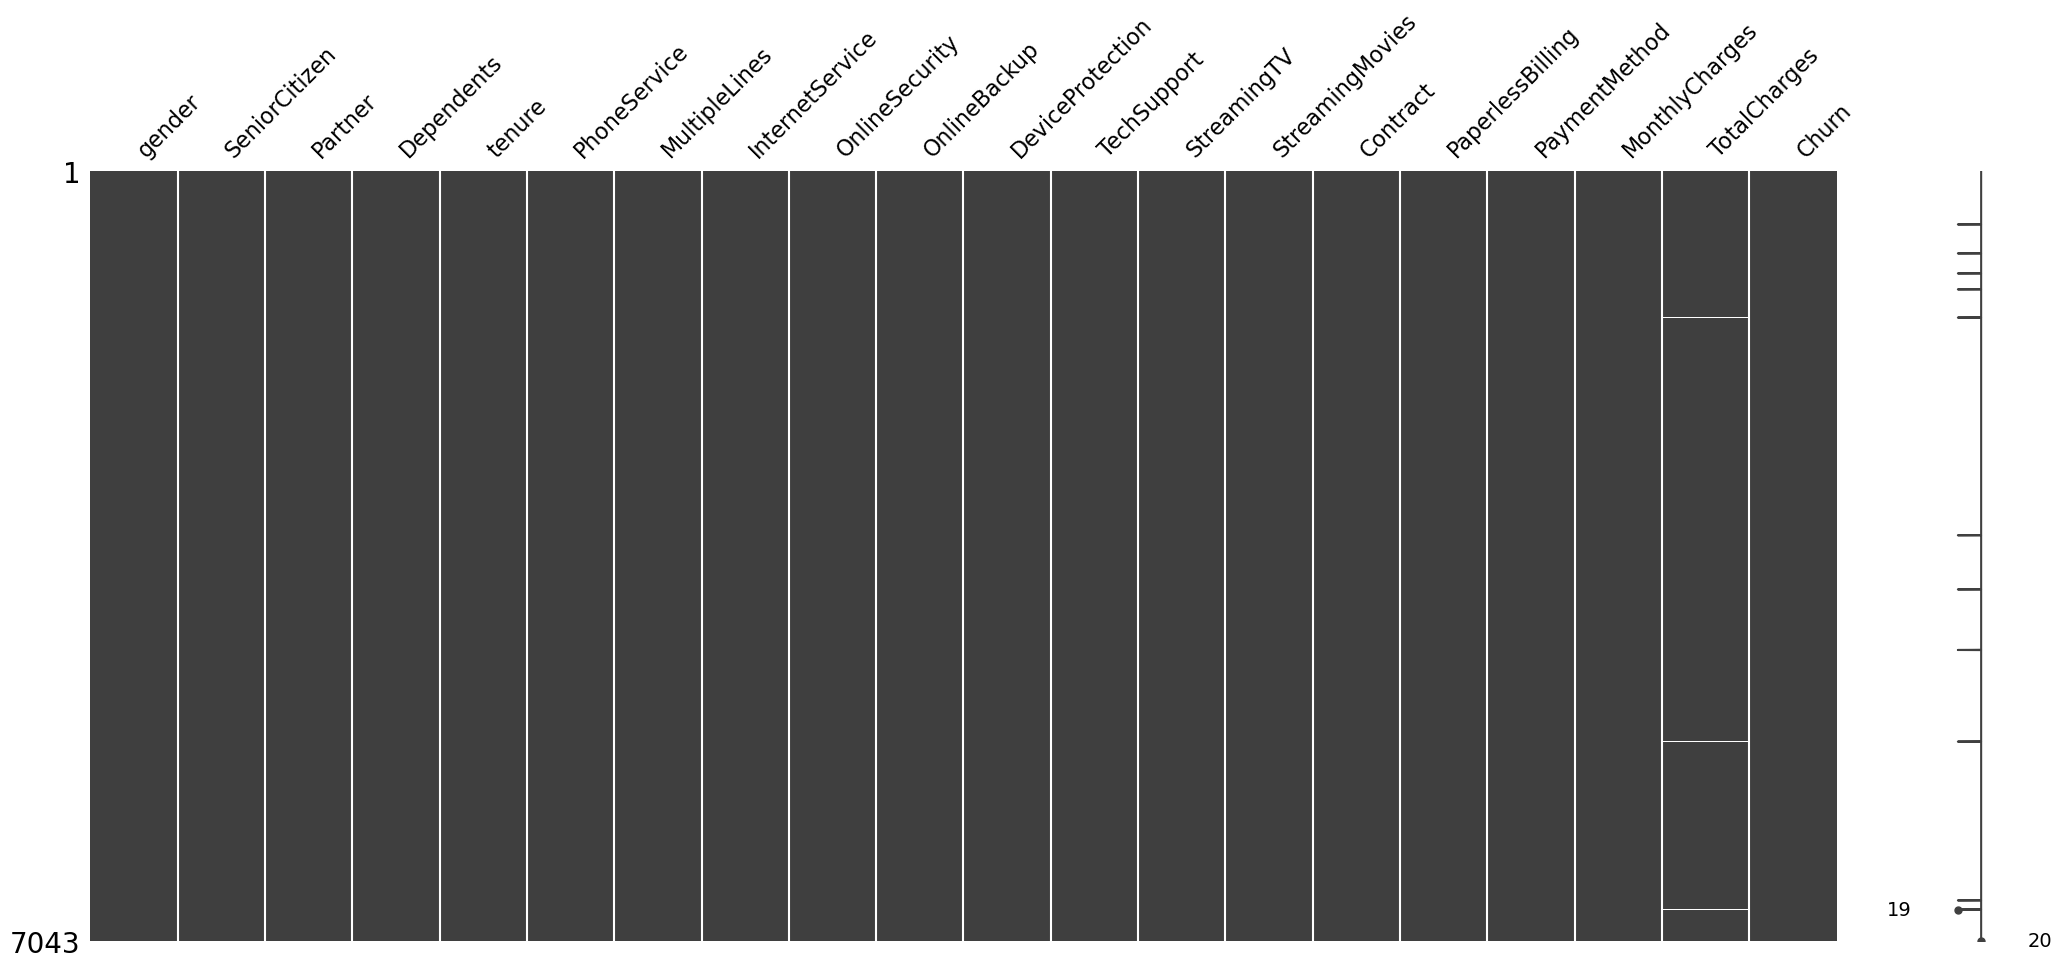

In [11]:
msno.matrix(df)

In [12]:
# after change datatype 'TotalCharges' from object to float, we have some missing value. Let's handling missing value with replace nan

df['TotalCharges'] = df['TotalCharges'].fillna(method="ffill")

In [13]:
# check more missing value

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Get info about datatype of each column

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**We have 20 columns and 7043 entries data**

- customerID: customer ID
- gender: customer gender (Male/Female)
- seniorCitizen: whether the customer is a senior citizen (1/0)
- partner: whether the customer has a partner (Yes/No)
- dependents: whether the customer has dependents (Yes/No)
- tenure: number of months the customer has stayed with the company
- phoneService: whether the customer has phone service (Yes/No)
- multipleLines: whether the customer has multiple lines (Yes/No/No phone service)
- internetService: customer’s internet service provider (DSL/Fiber optic/No)
- onlineSecurity: whether the customer has online security (Yes/No/No internet service)
- onlineBackup: whether the customer has online backup (Yes/No/No internet service)
- deviceProtection: whether the customer has device protection (Yes/No/No internet service)
- techSupport: whether the customer has tech support (Yes/No/No internet service)
- streamingTV: whether the customer has streaming TV (Yes/No/No internet service)
- streamingMovies: whether the customer has streaming movies (Yes/No/No internet service)
- contract: the contract term of the customer (Month-to-month/One year/Two year)
- paperlessBilling: whether the customer has paperless billing (Yes/No)
- paymentMethod: the customer’s payment method (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic))
- monthlyCharges: the amount charged to the customer monthly
- totalCharges: the total amount charged to the customer
- churn: whether the customer churned (Yes/No)

## Single Visualization Variable

### Identify target data churn and all each single variable column

#### Churn

In [15]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**There are 5709 No Churn labels and 1869 Yes Churn labels**

In [16]:
# pie plott

# make function for category churn 

def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "husl"):
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    fig = plt.figure(figsize= (20,5))
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    
    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

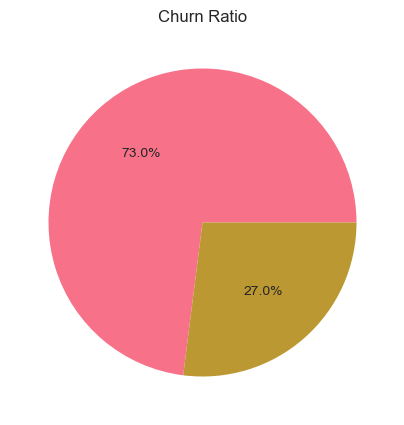

In [17]:
# call function for pie plott churn

Groupby_OneCol_comp_plot(df, 'Churn')

#### Categorical variables

gender
Male      3555
Female    3488
Name: count, dtype: int64


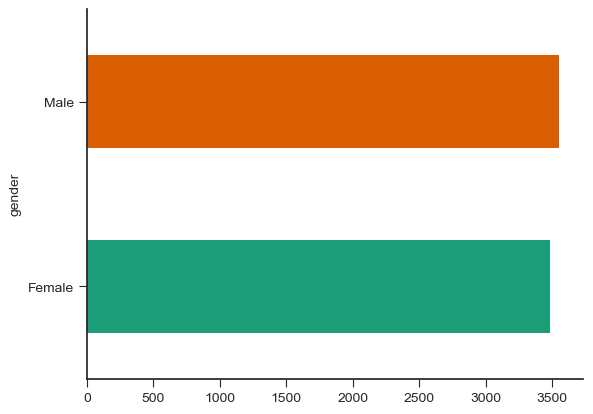

In [18]:
# @title gender

print(df['gender'].value_counts())
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


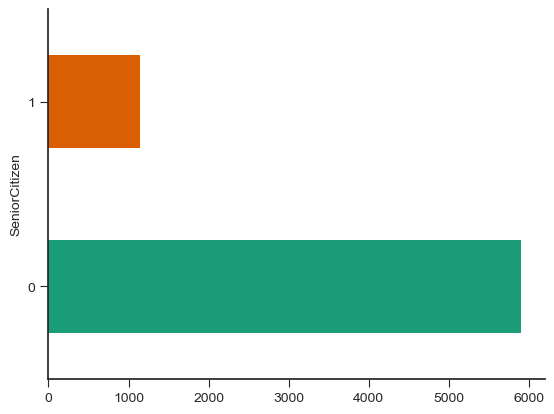

In [19]:
# @title senior citizen

print(df['SeniorCitizen'].value_counts())
df.groupby('SeniorCitizen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Partner
No     3641
Yes    3402
Name: count, dtype: int64


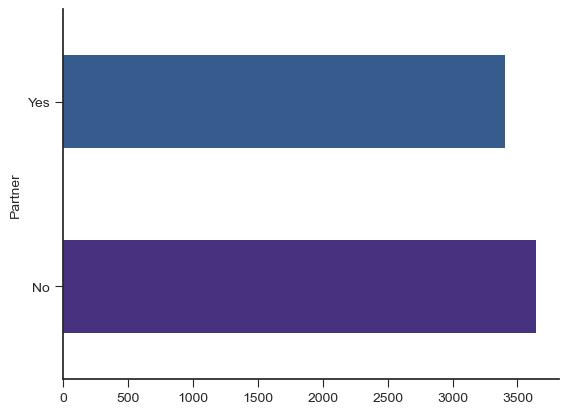

In [20]:
# @title partner

print(df['Partner'].value_counts())
df.groupby('Partner').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


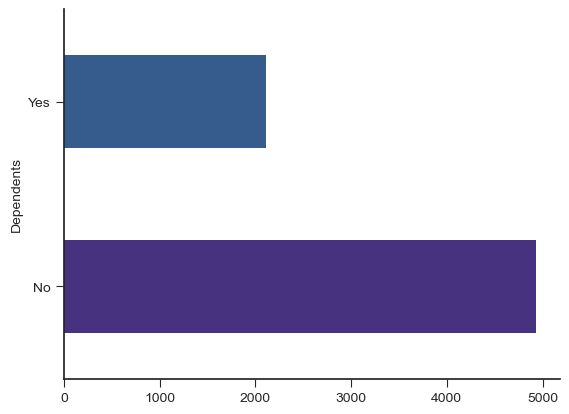

In [21]:
# @title dependents

print(df['Dependents'].value_counts())
df.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


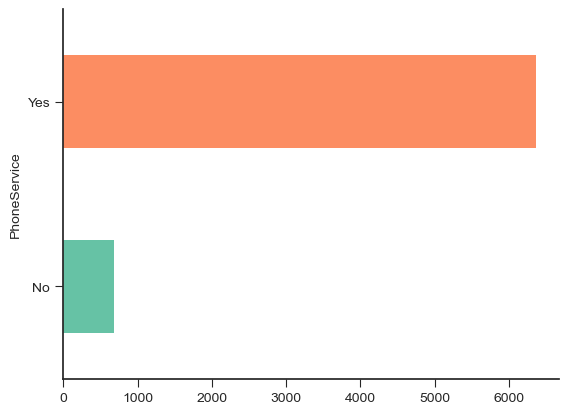

In [22]:
# @title phoneService

print(df['PhoneService'].value_counts())
df.groupby('PhoneService').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


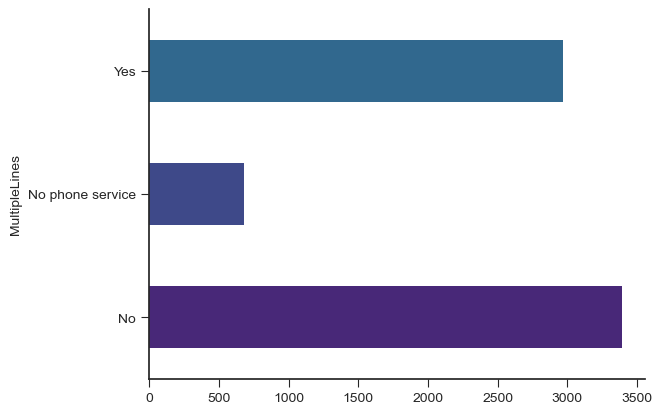

In [23]:
# @title MultipleLines

print(df['MultipleLines'].value_counts())
df.groupby('MultipleLines').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis', 8))
plt.gca().spines[['top', 'right',]].set_visible(False)

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


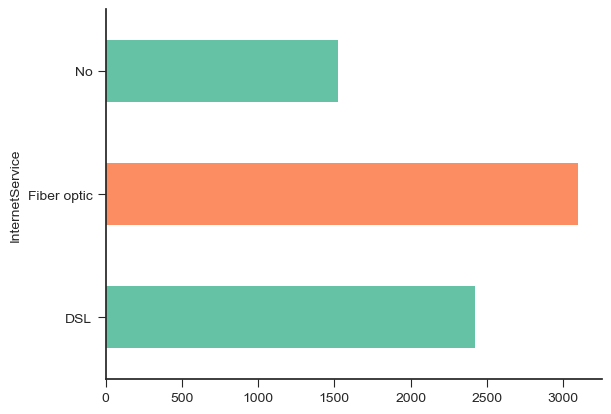

In [24]:
# @title InternetService

print(df['InternetService'].value_counts())
df.groupby('InternetService').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2', 2))
plt.gca().spines[['top', 'right',]].set_visible(False)

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


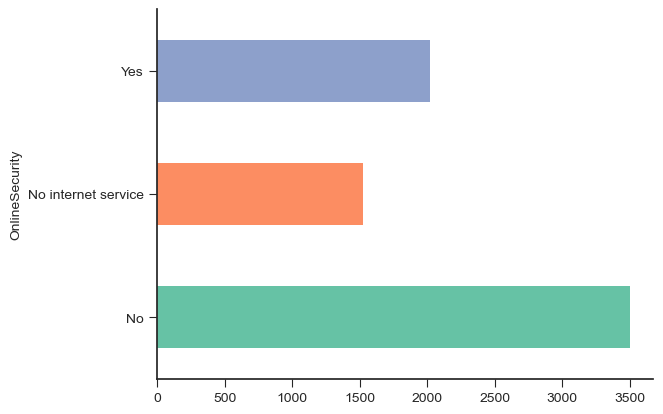

In [25]:
# @title OnlineSecurity

print(df['OnlineSecurity'].value_counts())
df.groupby('OnlineSecurity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2',3))
plt.gca().spines[['top', 'right',]].set_visible(False)

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


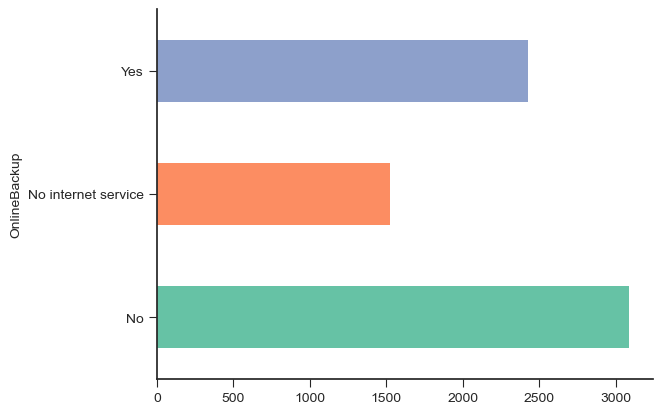

In [26]:
# @title OnlineBackup

print(df['OnlineBackup'].value_counts())
df.groupby('OnlineBackup').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2', 4))
plt.gca().spines[['top', 'right',]].set_visible(False)

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


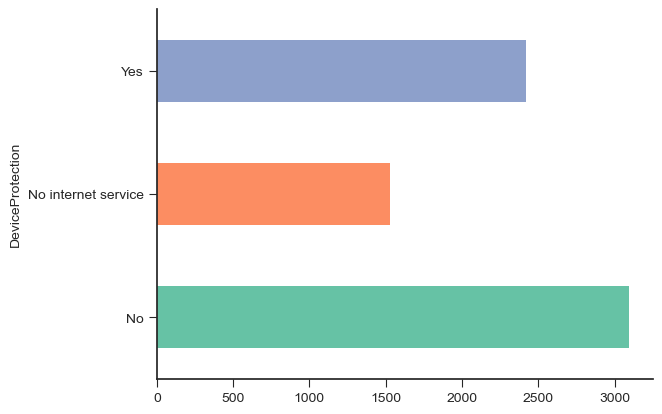

In [27]:
# @title DeviceProtection

print(df['DeviceProtection'].value_counts())
df.groupby('DeviceProtection').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


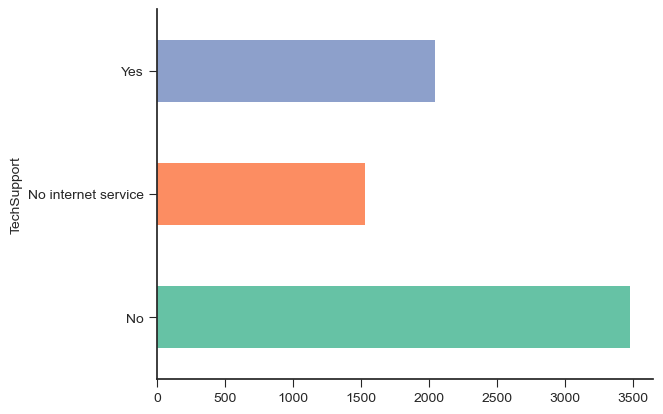

In [28]:
# @title TechSupport

print(df['TechSupport'].value_counts())
df.groupby('TechSupport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


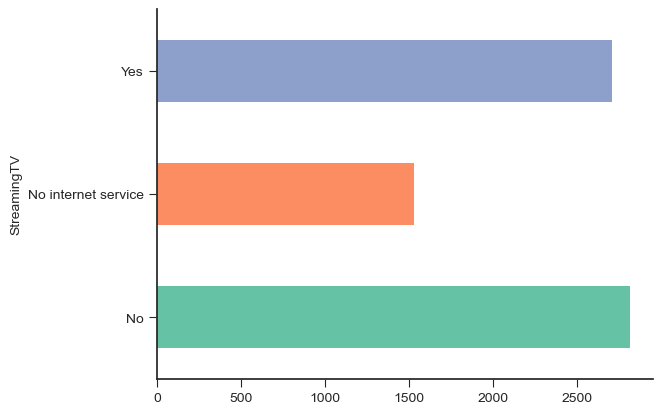

In [29]:
# @title StreamingTV

print(df['StreamingTV'].value_counts())
df.groupby('StreamingTV').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


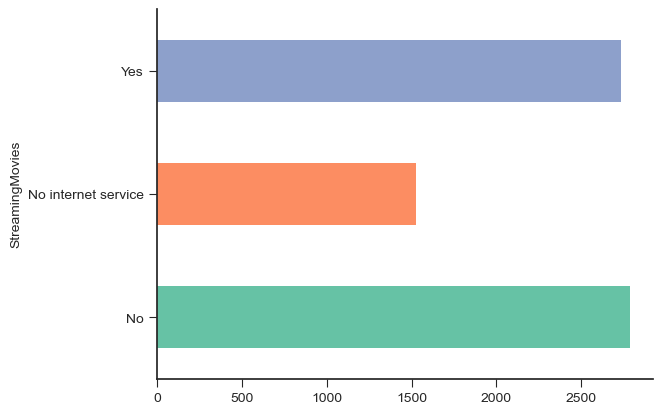

In [30]:
# @title StreamingMovies

print(df['StreamingMovies'].value_counts())
df.groupby('StreamingMovies').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


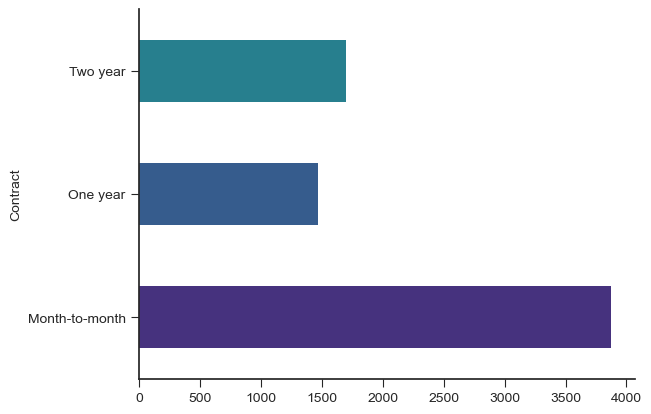

In [31]:
# @title Contract

print(df['Contract'].value_counts())
df.groupby('Contract').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


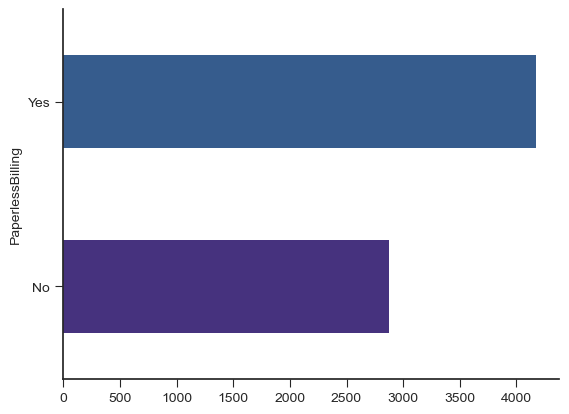

In [32]:
# @title PaperlessBilling

print(df['PaperlessBilling'].value_counts())
df.groupby('PaperlessBilling').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


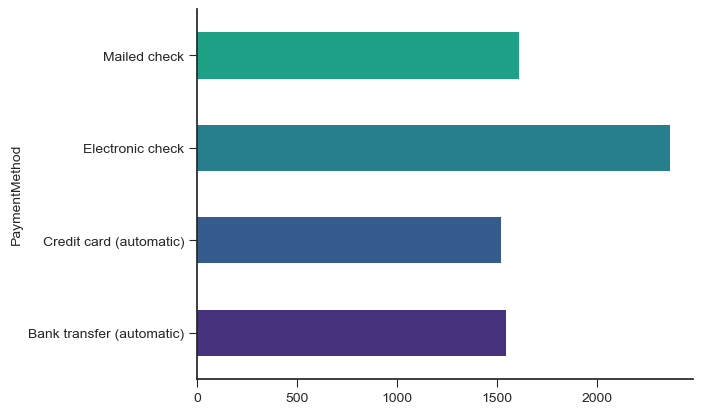

In [33]:
# @title PaymentMethod

print(df['PaymentMethod'].value_counts())
df.groupby('PaymentMethod').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Numerical variables

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.959570
dtype: float64


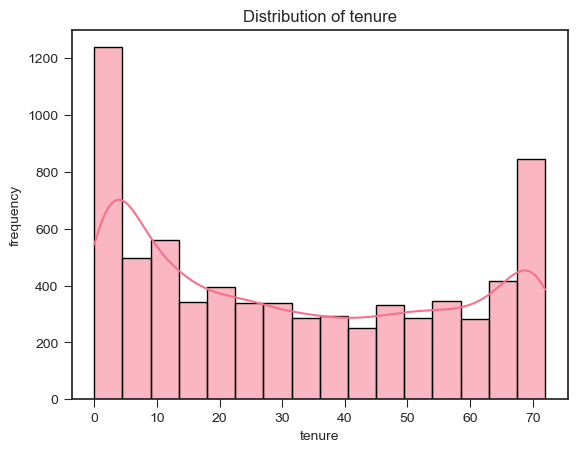

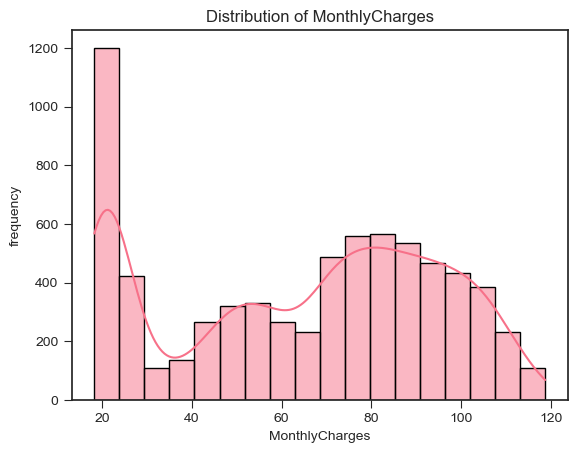

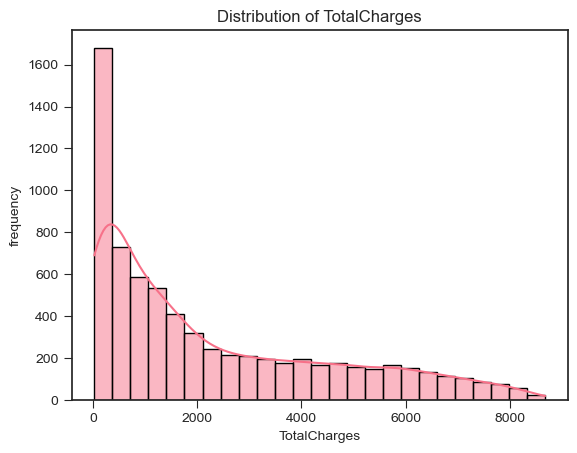

In [34]:
#Distribution of Numerical Columns
n_columns = ['tenure','MonthlyCharges','TotalCharges']
skew_df = df[n_columns].skew()
print(skew_df)

for col in n_columns:   
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

### Between Relation variable

gender
Female    939
Male      930
Name: count, dtype: int64


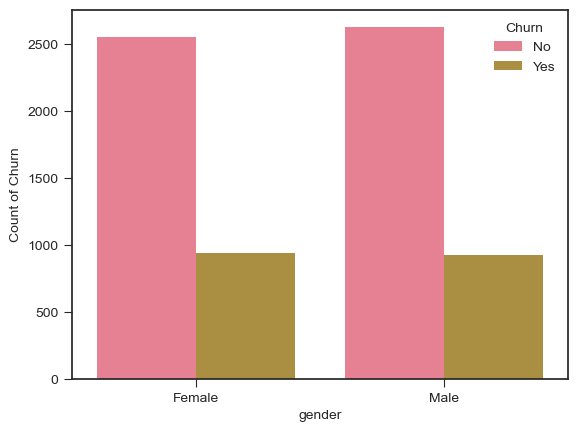

In [35]:
#count of Churn & non Churn customer wrt Gender
chur_gender = df[df['Churn'] == 'Yes']['gender'].value_counts()
print(chur_gender)
sns.countplot(x='gender',hue='Churn',data=df)
plt.xlabel('gender')
plt.ylabel('Count of Churn')
plt.show()

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


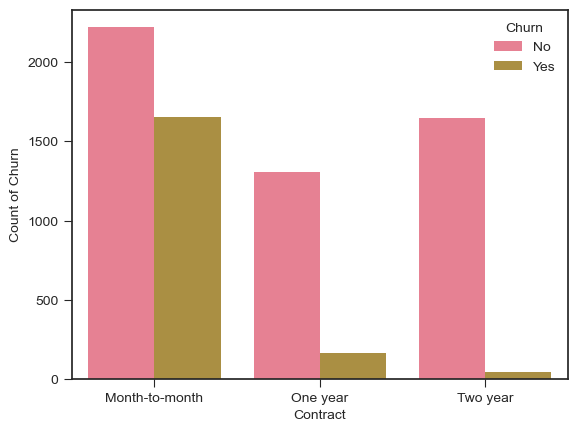

In [36]:
#count of Churn & non Churn customer wrt Contract
chur_contract = df[df['Churn'] == 'Yes']['Contract'].value_counts()
print(chur_contract)
sns.countplot(x='Contract',hue='Churn',data=df)
plt.xlabel('Contract')
plt.ylabel('Count of Churn')
plt.show()

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64


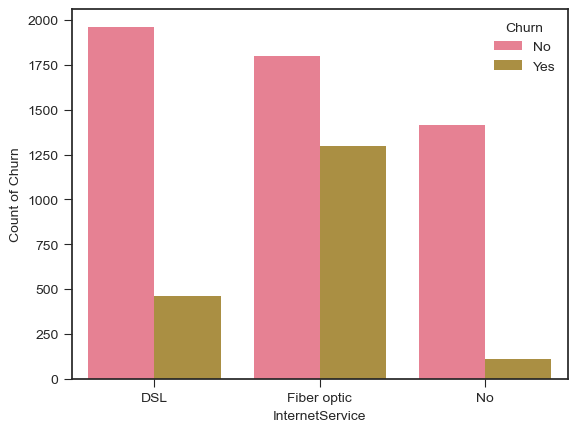

In [37]:
#count of Churn & non Churn customer wrt InternetService
chur_internet = df[df['Churn'] == 'Yes']['InternetService'].value_counts()
print(chur_internet)
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.xlabel('InternetService')
plt.ylabel('Count of Churn')
plt.show()

# Prepocessing Data

In [38]:
print (df['Partner'].value_counts(ascending=True))

Partner
Yes    3402
No     3641
Name: count, dtype: int64


In [39]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("****************************************************")

gender : ['Female' 'Male']
****************************************************
Partner : ['Yes' 'No']
****************************************************
Dependents : ['No' 'Yes']
****************************************************
PhoneService : ['No' 'Yes']
****************************************************
MultipleLines : ['No phone service' 'No' 'Yes']
****************************************************
InternetService : ['DSL' 'Fiber optic' 'No']
****************************************************
OnlineSecurity : ['No' 'Yes' 'No internet service']
****************************************************
OnlineBackup : ['Yes' 'No' 'No internet service']
****************************************************
DeviceProtection : ['No' 'Yes' 'No internet service']
****************************************************
TechSupport : ['No' 'Yes' 'No internet service']
****************************************************
StreamingTV : ['No' 'Yes' 'No internet service']
*******************

**Sel di atas menunjukkan kepada kita daftar semua fitur dengan variabel kategori masing-masing**

In [40]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

**Replace long negative text by "No" for ease of access**

In [41]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("****************************************************")

gender : ['Female' 'Male']
****************************************************
Partner : ['Yes' 'No']
****************************************************
Dependents : ['No' 'Yes']
****************************************************
PhoneService : ['No' 'Yes']
****************************************************
MultipleLines : ['No' 'Yes']
****************************************************
InternetService : ['DSL' 'Fiber optic' 'No']
****************************************************
OnlineSecurity : ['No' 'Yes']
****************************************************
OnlineBackup : ['Yes' 'No']
****************************************************
DeviceProtection : ['No' 'Yes']
****************************************************
TechSupport : ['No' 'Yes']
****************************************************
StreamingTV : ['No' 'Yes']
****************************************************
StreamingMovies : ['No' 'Yes']
****************************************************
Contract : 

### Gender

In [42]:
print(df['gender'].value_counts(ascending=True))

gender
Female    3488
Male      3555
Name: count, dtype: int64


In [43]:
# Replacing Male be 0 and Female by 1

df['gender'].replace({'Female':1,'Male':0},inplace=True)
df['gender'].head()

0    1
1    0
2    0
3    0
4    1
Name: gender, dtype: int64

In [44]:
print(df['InternetService'].value_counts(ascending=True))

InternetService
No             1526
DSL            2421
Fiber optic    3096
Name: count, dtype: int64


**There are few features in which categorical variables are more than two and they are not "Yes" or "No" types**

In [45]:
for i in df.columns:
    if (len(df[i].unique()) >2) & (df[i].dtypes != "int64") &(df[i].dtypes!= "float64"):
        print(i)

InternetService
Contract
PaymentMethod


**Di atas 3 kolom Fitur dalam kumpulan data memiliki lebih dari 2 nilai kategorikal**

In [46]:
print(df['InternetService'].value_counts(ascending=True))

InternetService
No             1526
DSL            2421
Fiber optic    3096
Name: count, dtype: int64


In [47]:
print(df['Contract'].value_counts(ascending=True))

Contract
One year          1473
Two year          1695
Month-to-month    3875
Name: count, dtype: int64


In [48]:
print(df['PaymentMethod'].value_counts(ascending=True))

PaymentMethod
Credit card (automatic)      1522
Bank transfer (automatic)    1544
Mailed check                 1612
Electronic check             2365
Name: count, dtype: int64


In [49]:
len(df['PaymentMethod'].unique())

4

In [50]:
df.shape

(7043, 20)

In [51]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
for i in df.columns:
    if (df[i].dtypes == "int64")  | (df[i].dtypes== "float64"):
        print(i)

gender
SeniorCitizen
tenure
MonthlyCharges
TotalCharges


**Kolom fitur di atas memiliki data numerik sehingga kita perlu membawanya ke rentang tertentu jika datanya sangat bervariasi**

In [53]:
# Using MinMaxScaler of Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

- Here we will consider gender and seniorcitizen because because their values already present in a small scale of 0 or 1
- So we will consider only "tenure", "MonthlyCharges", "TotalCharges"

In [54]:
large_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[large_cols] = scaler.fit_transform(df[large_cols])
df[large_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


In [55]:
# After feature scaling we have following dataset

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,0.013889,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,0,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,0,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,0,0,No,No,0.625000,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,1,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


In [56]:
for i in df.columns:
    if (df[i].dtypes == "object"):
        print(i)

Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [67]:
df['Contract'].replace({'Month-to-month':0,'One year':1, 'Two year':2},inplace=True)
df['Contract'].head()

0    0
1    1
2    0
3    1
4    0
Name: Contract, dtype: int64

In [68]:
df['InternetService'].replace({'No':0,'Fiber optic':1, 'DSL':2},inplace=True)
df['InternetService'].head()

0    2
1    2
2    2
3    2
4    1
Name: InternetService, dtype: int64

In [78]:
df['PaymentMethod'].replace({'Bank transfer (automatic)':0,'Credit card (automatic)':1, 'Electronic check':2, 'Mailed check':3},inplace=True)
df['PaymentMethod'].head()

0    2
1    3
2    3
3    0
4    2
Name: PaymentMethod, dtype: int64

**All the column present above have object type of dataset in them i.e here only "Yes" or "No"**

In [79]:
two_cate_string = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling' , 'Churn']
for i in two_cate_string:
    df[i].replace({"No":0, "Yes":1}, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.013889,0,0,2,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0,0.472222,1,0,2,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0,0.027778,1,0,2,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0,0.625000,0,0,2,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,1,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


# Splitting Data

In [273]:
# Splitting Dataset into train and test set

X = df.drop('Churn', axis=1)
y = df['Churn']

In [274]:
X.shape, y.shape

((7043, 19), (7043,))

In [275]:
# Train Test Splitt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0, stratify=y)

# Modelling

## Logistic Regression

In [276]:
# Importing Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [277]:
param_grid = {
  'penalty':['l1','l2', 'elasticnet', 'none'],
  'C':[1, 10, 100, 1000],
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

lgc=LogisticRegression()
CV_lgc = GridSearchCV(estimator=lgc, param_grid=param_grid, cv = 5)
CV_lgc.fit(X_train, y_train)
CV_lgc.best_params_

{'C': 1, 'penalty': 'none', 'solver': 'newton-cg'}

In [278]:
# creating object for model
model_lg = LogisticRegression(C = 1, penalty= 'none', solver= 'newton-cg')

In [279]:
# Model Training

model_lg.fit(X_train, y_train)

LogisticRegression(C=1, penalty='none', solver='newton-cg')

In [280]:
# Making Predictions
pred_lg = model_lg.predict(X_test)

In [281]:
# Calculating Accuracy of the model

lg = round(accuracy_score(y_test, pred_lg)*100,2)
print(lg)

80.41


In [282]:
# Classification Report

print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409



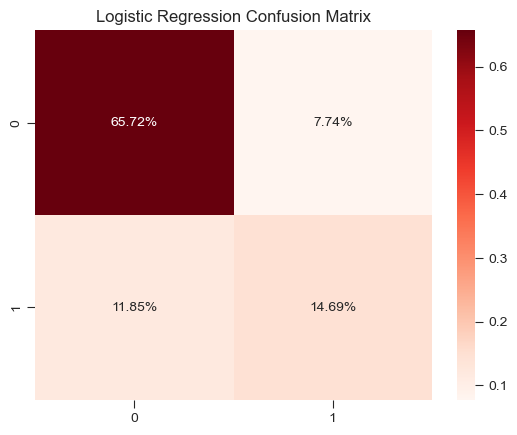

In [283]:
# confusion Matrix

cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
plt.show()

## Random Forest

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# hypertuning paramater menggunakan  GridSearch

param_grid = {
  'n_estimators': [200, 500, 700],
  'max_features': ['sqrt', 'log2'],
  'max_depth' : [4,5,6,7,8],
  'criterion' :['gini', 'entropy']
}

rfc=RandomForestClassifier(random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, verbose=3, param_grid=param_grid, cv = 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.800 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.787 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.807 total time=   2.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.792 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.774 total time=   3.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.803 total time=   4.8s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.787 total time=   3.9s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.806 total time=   3.3s
[CV 4/5] END criterion=gini, max_depth=4, max_feat

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [286]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=7, max_features='sqrt', random_state=0)

In [287]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500,
                       random_state=0)

In [288]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [289]:
# Calculating Accuracy Score
rf = round(accuracy_score(y_test, pred_rf)*100, 2)
print(rf)

80.62


In [290]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1035
           1       0.70      0.48      0.57       374

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



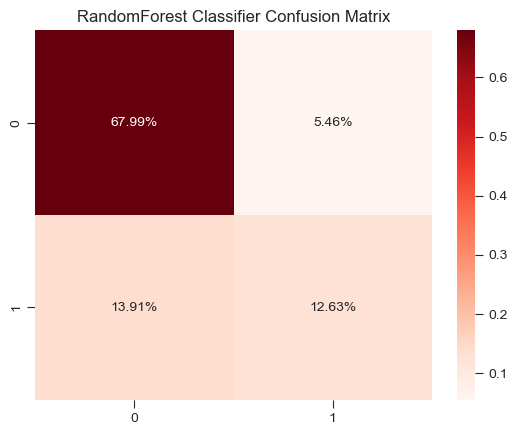

In [291]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

## SVM

In [292]:
from sklearn.svm import SVC, LinearSVC

In [293]:
param_grid = {
 'C' : [0.1,1, 10, 100],
 'kernel' : ['rbf','poly', 'sigmoid'],
}

sv = SVC(random_state=0)
CV_sv = GridSearchCV(estimator=sv, verbose = 3, param_grid=param_grid, cv= 5)
CV_sv.fit(X_train, y_train)
CV_sv.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.791 total time=   1.3s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.780 total time=   1.6s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.800 total time=   1.4s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.800 total time=   1.4s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.781 total time=   2.3s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.792 total time=   0.8s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.776 total time=   0.9s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.797 total time=   0.7s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.791 total time=   0.8s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.771 total time=   0.9s
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.645 total time=   1.2s
[CV 2/5] END .............C=0.1, kernel=sigmoid;

{'C': 1, 'kernel': 'rbf'}

In [294]:
model_svm = SVC(C = 1, kernel='rbf', random_state=0)

In [295]:
model_svm.fit(X_train, y_train)

SVC(C=1, random_state=0)

In [296]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [297]:
# Calculating Accuracy Score
sv = round(accuracy_score(y_test, pred_svm)*100, 2)
print(sv)

78.92


In [298]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



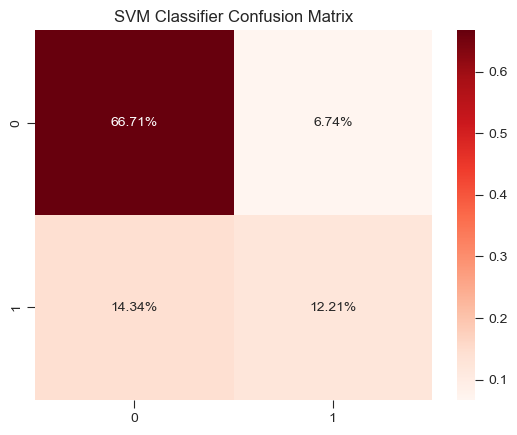

In [299]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("SVM Classifier Confusion Matrix",fontsize=12)
plt.show()

# Handling Imbalance dataset Using SMOTE

In [300]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.013889,0,0,2,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0,0.472222,1,0,2,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0,0.027778,1,0,2,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0,0.625000,0,0,2,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,1,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [311]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

In [312]:
X1, y1 = oversample.fit_resample(X,y)

In [313]:
X1.shape, y1.shape

((10348, 19), (10348,))

In [314]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X1, y1, test_size=0.2, random_state=0)

## Logistic Regression

In [315]:
# Grid search

param_grid = {
  'penalty':['l1','l2'],
  'C':[1, 10, 100, 1000],
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

lgc=LogisticRegression(random_state=0)
CV_lgc = GridSearchCV(estimator=lgc, verbose=3, param_grid=param_grid, cv = 5)
CV_lgc.fit(X_trains, y_trains)
CV_lgc.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [328]:
model_lgc_smt=LogisticRegression(C = 1, penalty= 'l2', solver= 'newton-cg')

In [329]:
model_lgc_smt.fit(X_trains,y_trains)

LogisticRegression(C=1, solver='newton-cg')

In [330]:
pred_lgc_smt = model_lgc_smt.predict(X_tests)

In [331]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

print('Accuracy :', round(accuracy_score(y_tests, pred_lgc_smt)*100,2),"%")
print('Precision:', round(precision_score(y_tests, pred_lgc_smt, average='weighted', zero_division=0)*100,2),"%")
print('Recall:', round(recall_score(y_tests, pred_lgc_smt, average='weighted', zero_division=0)*100,2), "%")
print('f1-score:',round(f1_score(y_tests,pred_lgc_smt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 78.5 %
Precision: 78.69 %
Recall: 78.5 %
f1-score: 78.46 %


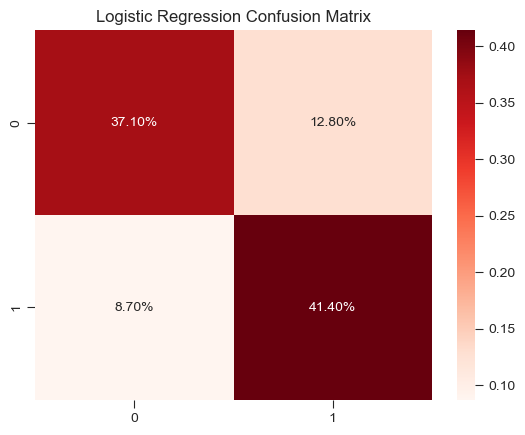

In [332]:
# confusion Matrix

cm1 = confusion_matrix(y_tests, pred_lgc_smt)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
plt.show()

## Random Forest

In [321]:
param_grid = {
  'n_estimators': [200, 500, 700],
  'max_features': ['sqrt', 'log2'],
  'max_depth' : [4,5,6,7,8],
  'criterion' :['gini', 'entropy'],
}

rfc=RandomForestClassifier(random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, verbose=3, param_grid=param_grid, cv = 5)
CV_rfc.fit(X_trains, y_trains)
CV_rfc.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.777 total time=   2.4s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.779 total time=   2.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.782 total time=   2.5s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.784 total time=   2.8s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.787 total time=   2.7s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.779 total time=   6.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.778 total time=   5.7s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.784 total time=   6.6s
[CV 4/5] END criterion=gini, max_depth=4, max_feat

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [333]:
# Creating model object
model_rf_smt = RandomForestClassifier(criterion='gini',max_depth=8, max_features='sqrt', n_estimators=500, random_state=0)

In [334]:
model_rf_smt.fit(X_trains,y_trains)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=0)

In [335]:
pred_rf_smt = model_rf_smt.predict(X_tests)

In [336]:
rf_smt  = round(accuracy_score(y_tests, pred_rf_smt)*100, 2)
print(rf_smt)

80.0


In [344]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

print('Accuracy :', round(accuracy_score(y_tests, pred_rf_smt)*100,2),"%")
print('Precision:', round(precision_score(y_tests, pred_rf_smt, average='weighted', zero_division=0)*100,2),"%")
print('Recall:', round(recall_score(y_tests, pred_rf_smt, average='weighted', zero_division=0)*100,2), "%")
print('f1-score:',round(f1_score(y_tests,pred_rf_smt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 80.0 %
Precision: 80.42 %
Recall: 80.0 %
f1-score: 79.93 %


## SVM

In [338]:
param_grid = {
 'C' : [0.1,1, 10, 100],
 'kernel' : ['rbf','poly', 'sigmoid'],
}

sv_smt = SVC(random_state = 0)
CV_sv_smt = GridSearchCV(estimator=sv_smt, verbose = 3, param_grid=param_grid, cv= 5)
CV_sv_smt.fit(X_trains, y_trains)
CV_sv_smt.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.768 total time=   3.7s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.772 total time=   3.7s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.782 total time=   3.2s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.770 total time=   2.9s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.779 total time=   3.3s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.764 total time=   2.1s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.778 total time=   2.6s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.778 total time=   2.2s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.763 total time=   2.3s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.770 total time=   2.0s
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.656 total time=   3.4s
[CV 2/5] END .............C=0.1, kernel=sigmoid;

{'C': 100, 'kernel': 'rbf'}

In [339]:
model_svm_smt = SVC(C = 100, kernel='rbf', random_state = 0)

In [340]:
model_svm_smt.fit(X_trains, y_trains)

SVC(C=100, random_state=0)

In [341]:
# Making Prediction
pred_svm_smt = model_svm_smt.predict(X_tests)

In [342]:
# Calculating Accuracy Score
sv_smt = round(accuracy_score(y_tests, pred_svm_smt)*100, 2)
print(sv_smt)

81.01


In [343]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

print('Accuracy :', round(accuracy_score(y_tests, pred_svm_smt)*100,2),"%")
print('Precision:', round(precision_score(y_tests, pred_svm_smt, average='weighted', zero_division=0)*100,2),"%")
print('Recall:', round(recall_score(y_tests, pred_svm_smt, average='weighted', zero_division=0)*100,2), "%")
print('f1-score:',round(f1_score(y_tests,pred_svm_smt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 81.01 %
Precision: 81.7 %
Recall: 81.01 %
f1-score: 80.91 %


In [345]:
import joblib

# Simpan model dalam format joblib
joblib.dump(model_svm_smt, 'svm.joblib')

['svm.joblib']

In [347]:
import pickle

filename = 'churn_model.sav'
pickle.dump(model_svm_smt, open(filename, 'wb'))